In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
import faiss
import pandas as pd

### HOG (Histogram of Oriented Gradients)

Read paths

In [52]:
paths_db = pd.read_csv("database/db.csv", index_col=0)
paths = paths_db['image'].values.tolist()
paths = ["images\\" + path for path in paths]

Transformation function

In [53]:
def extract_hog_features(img):

    def preprocess_image(img):
        image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (224, 224))
        return image
    
    prep_image = preprocess_image(img)
    features, _ = hog(prep_image, orientations=5, pixels_per_cell=(24, 24), cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')
    return features

Application of the function

In [54]:
hog_features = []
dimension = 1280

for path in paths:
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    features = extract_hog_features(img)
    hog_features.append(features.reshape(dimension))

Creation of the index

In [55]:
index = faiss.IndexFlatL2(dimension)

vectores = np.array(hog_features, dtype=np.float32)

faiss.normalize_L2(vectores)

index.add(vectores)

In [56]:
faiss.write_index(index, 'database\hog.index')

Test

Distances:  [[49.       52.056816 52.093826 52.21704  52.282413]]
Indices:  [[  1   4 267  69 331]]


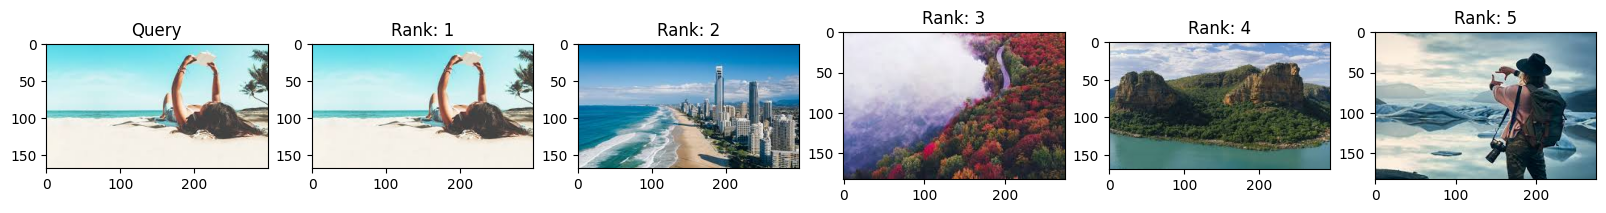

In [57]:
index = faiss.read_index("database/hog.index")

img_test = "images\Training Data\Coast\Coast-Train (10).jpeg"

img = cv2.imread(img_test)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

query = extract_hog_features(img).reshape(dimension)

query = np.array([query])

k = 5
distances, indices = index.search(query, k)

print("Distances: ", distances)
print("Indices: ", indices)

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plt.subplot(1, 6, 1)
plt.imshow(img)
plt.title("Query")

for i in range(5):
    img = cv2.imread(paths[indices[0][i]])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 6, i+2)
    plt.imshow(img)
    plt.title("Rank: " + str(i+1))

plt.show()